In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

17.4 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
# Defining the k-means

cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

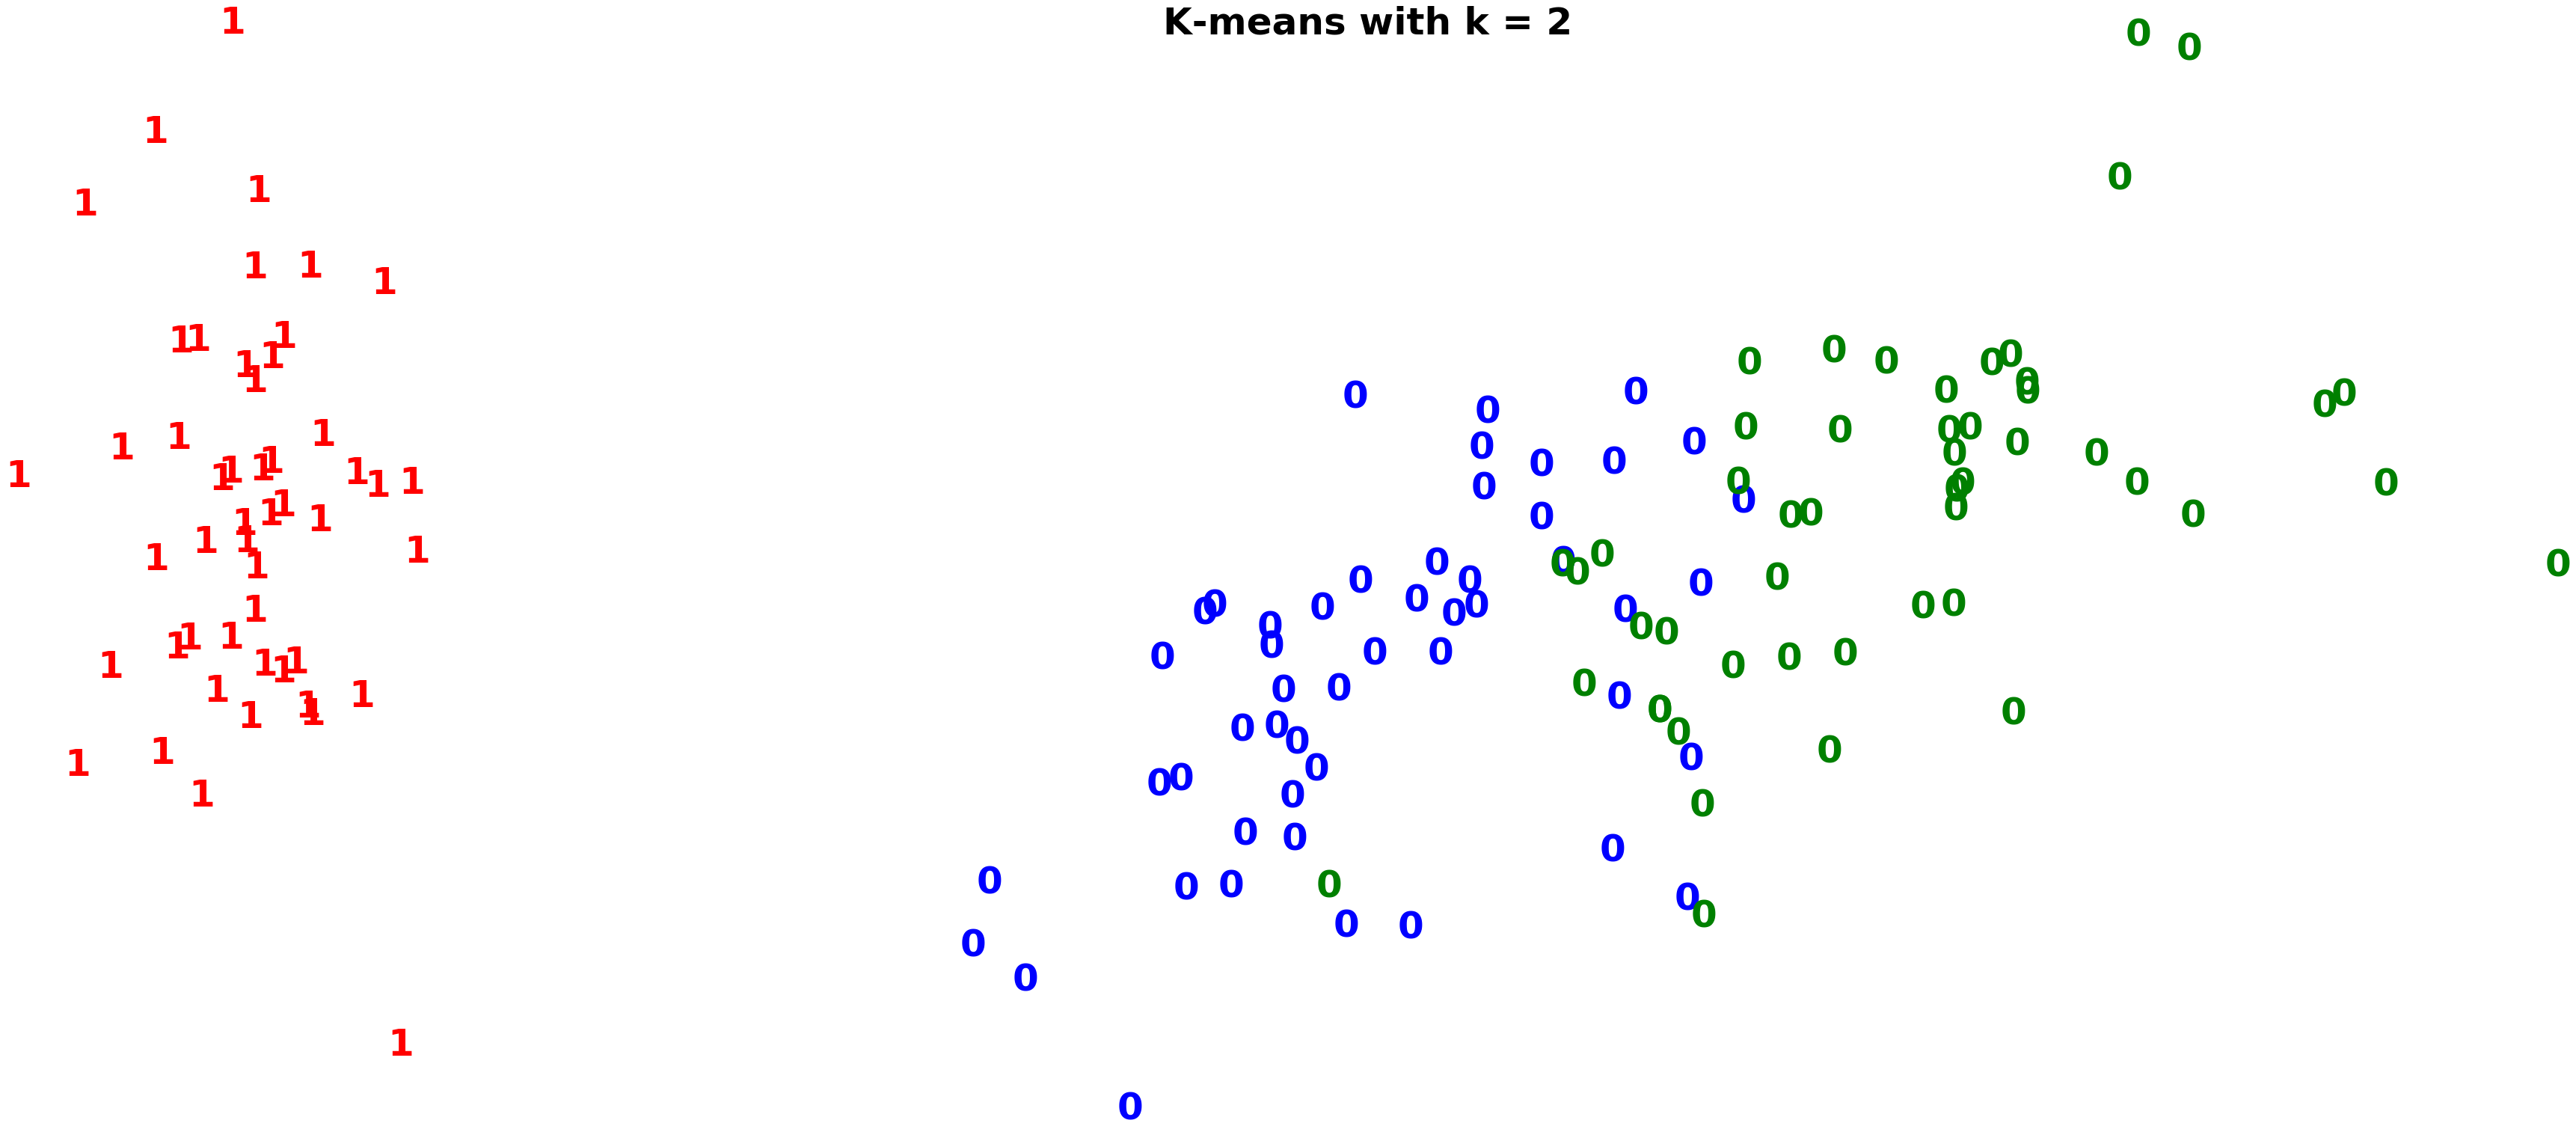

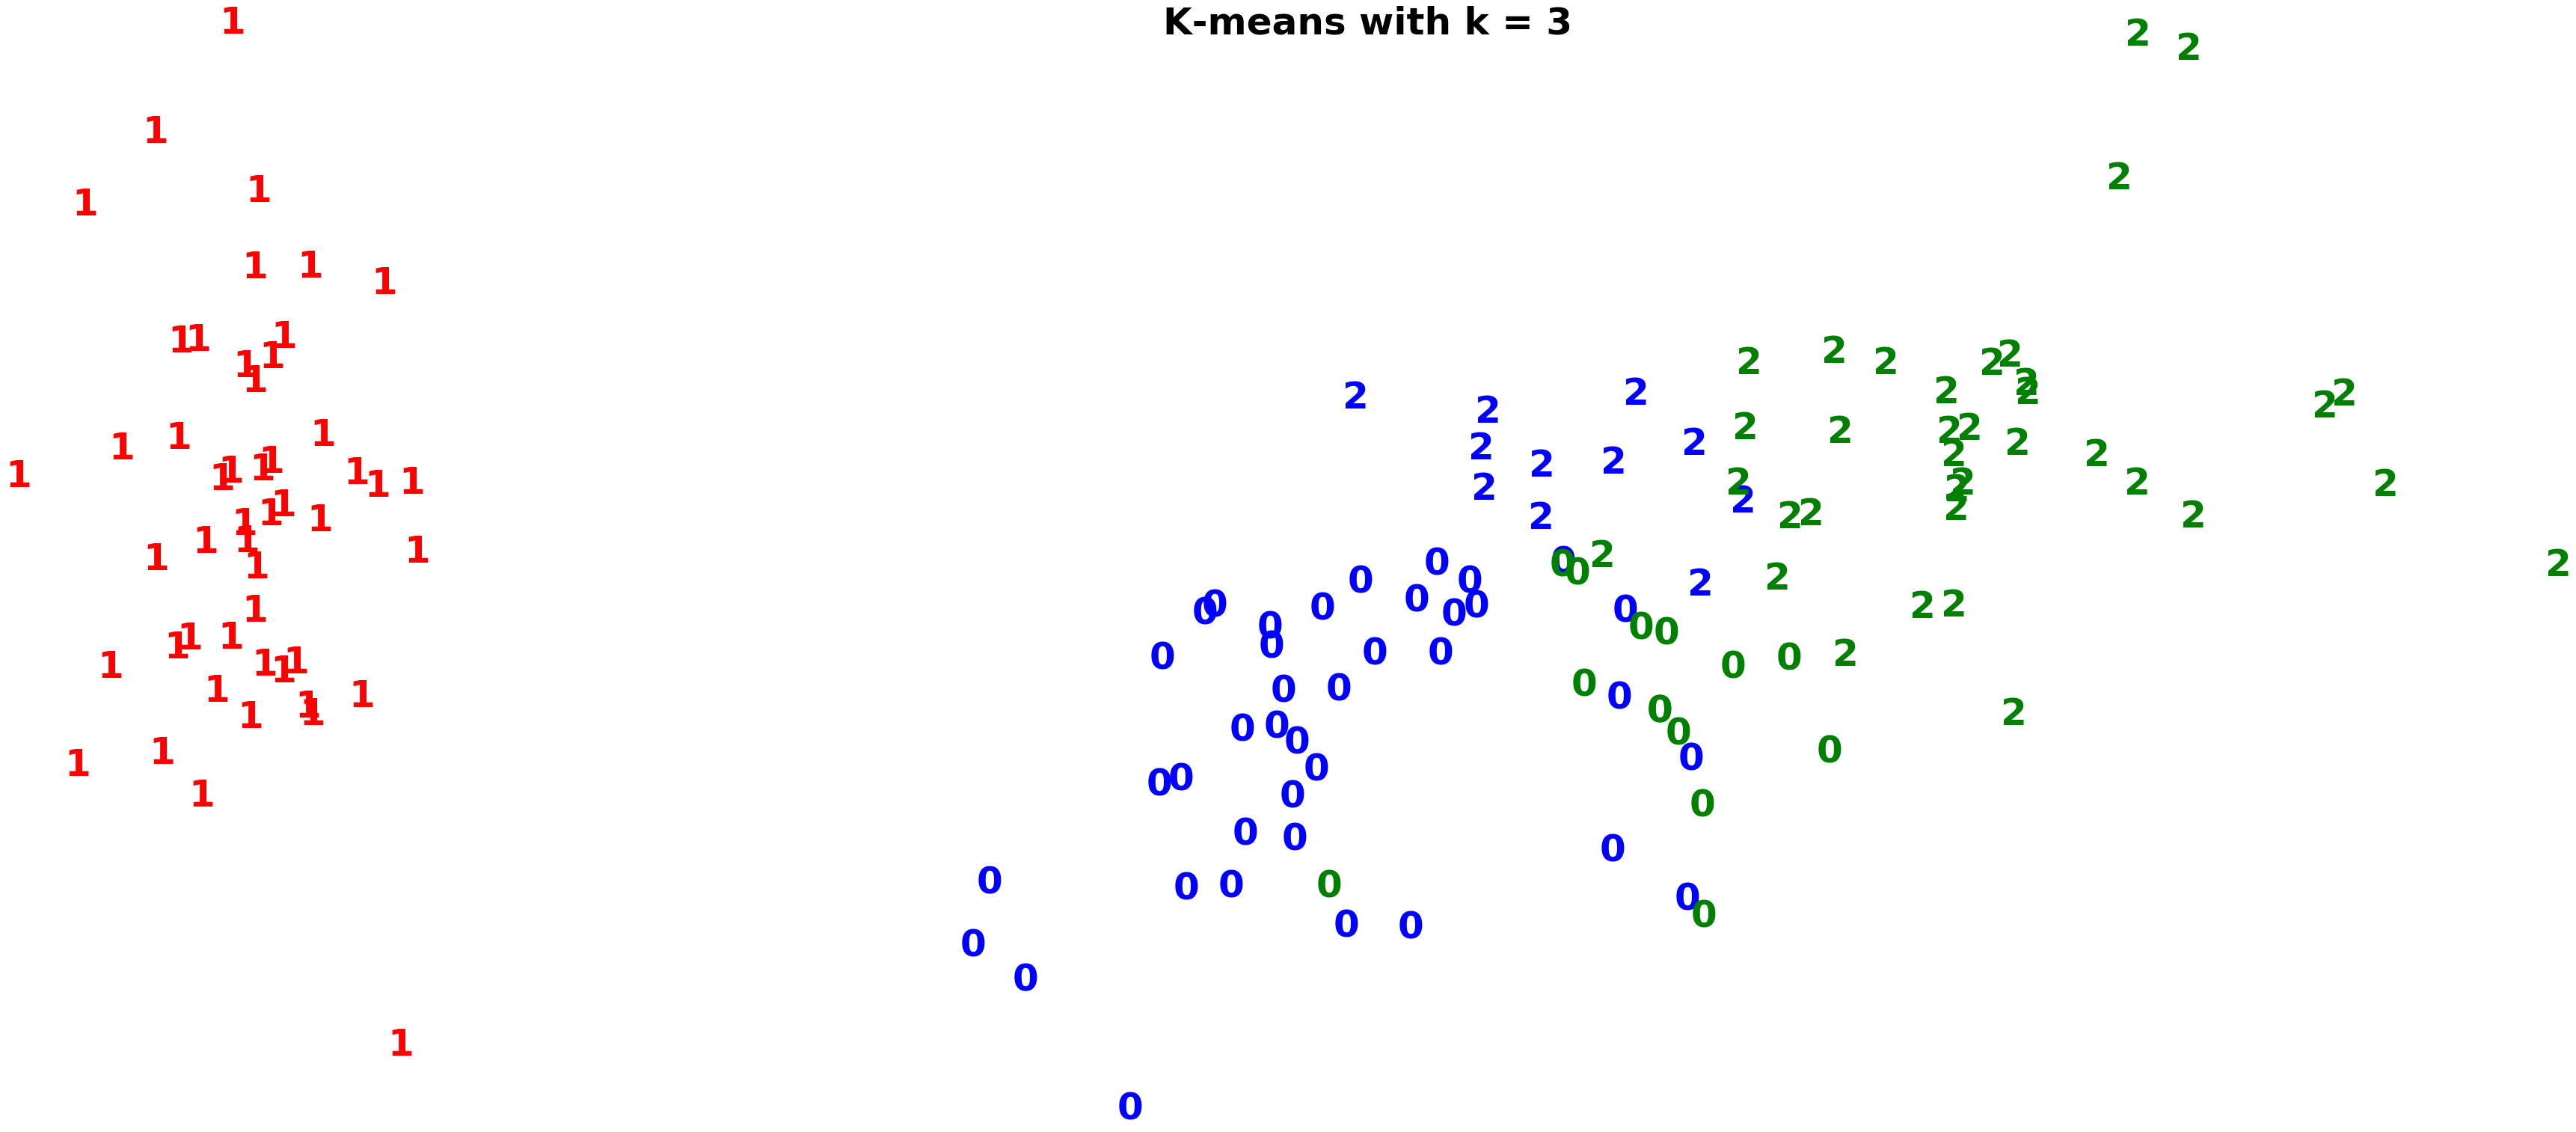

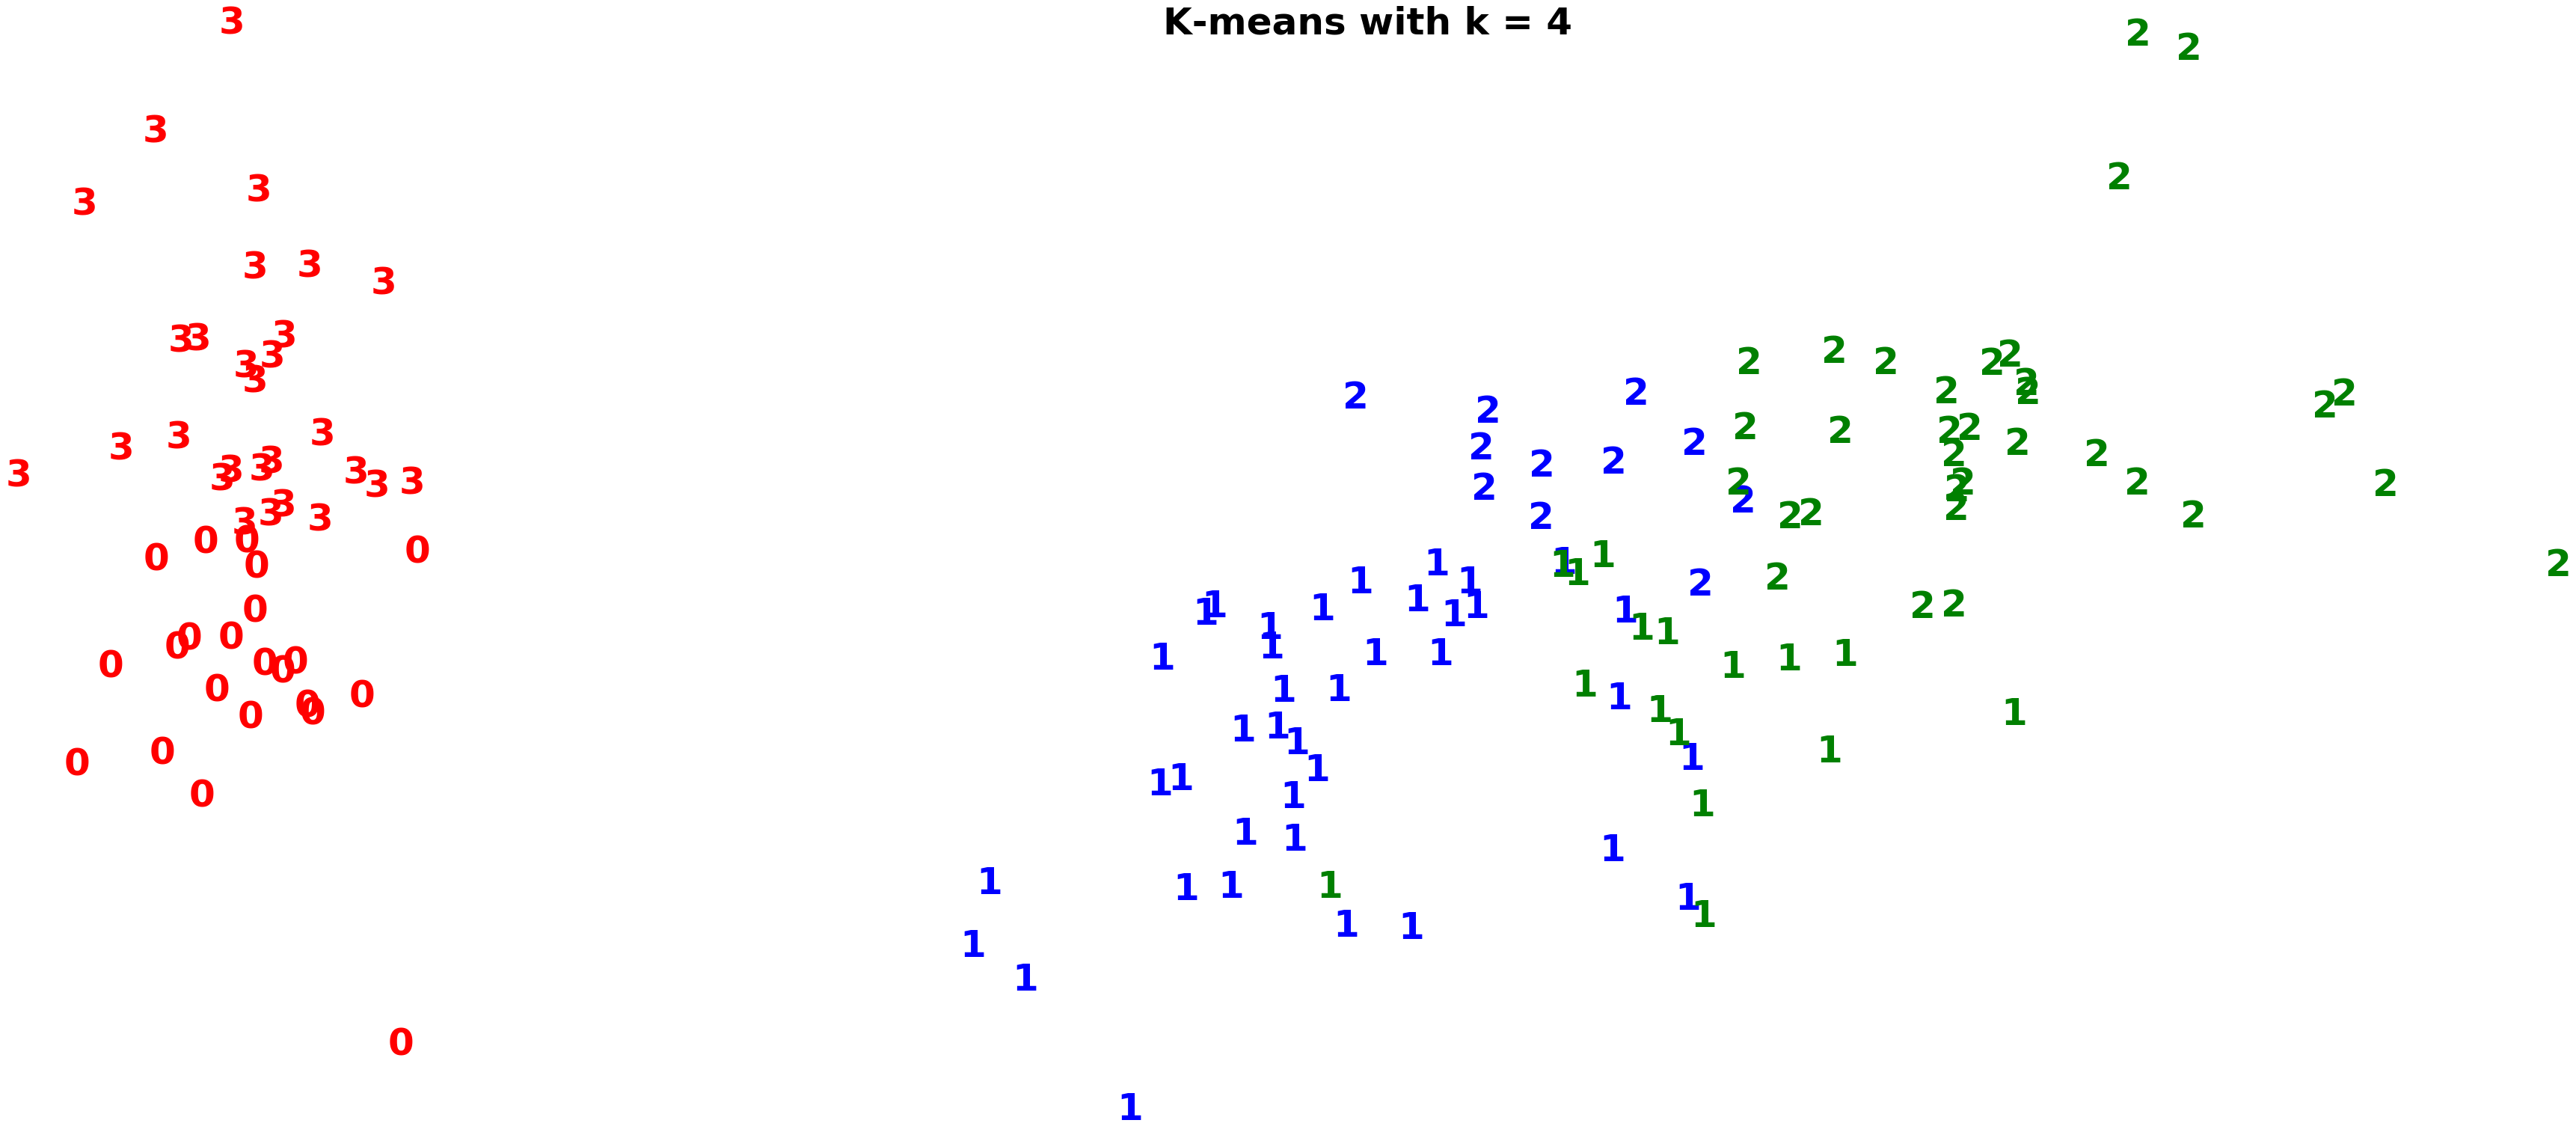

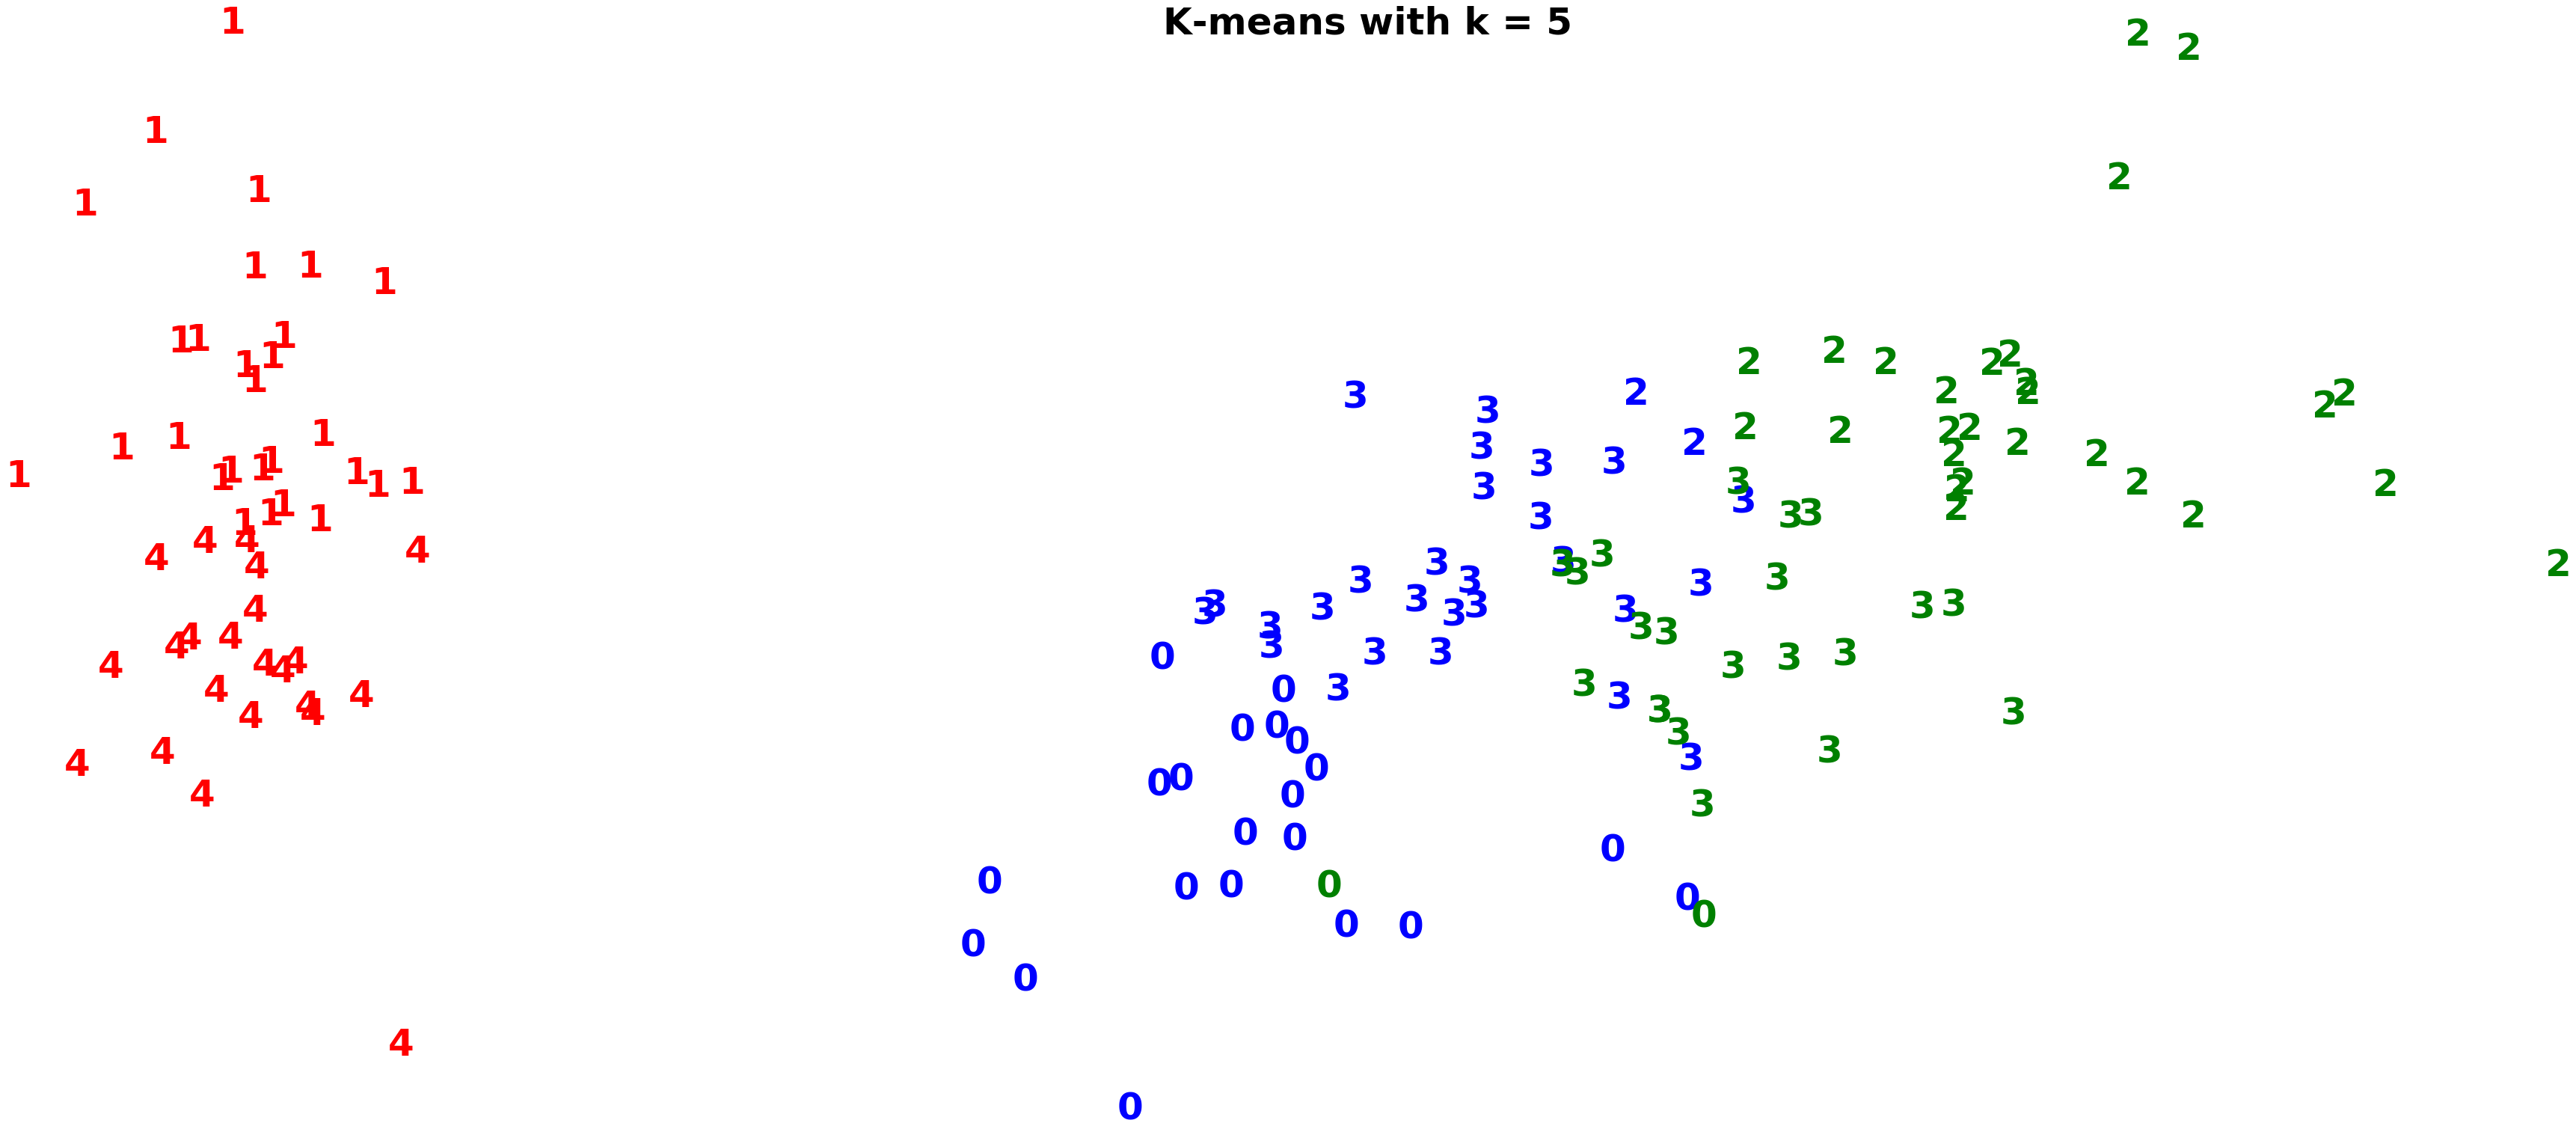

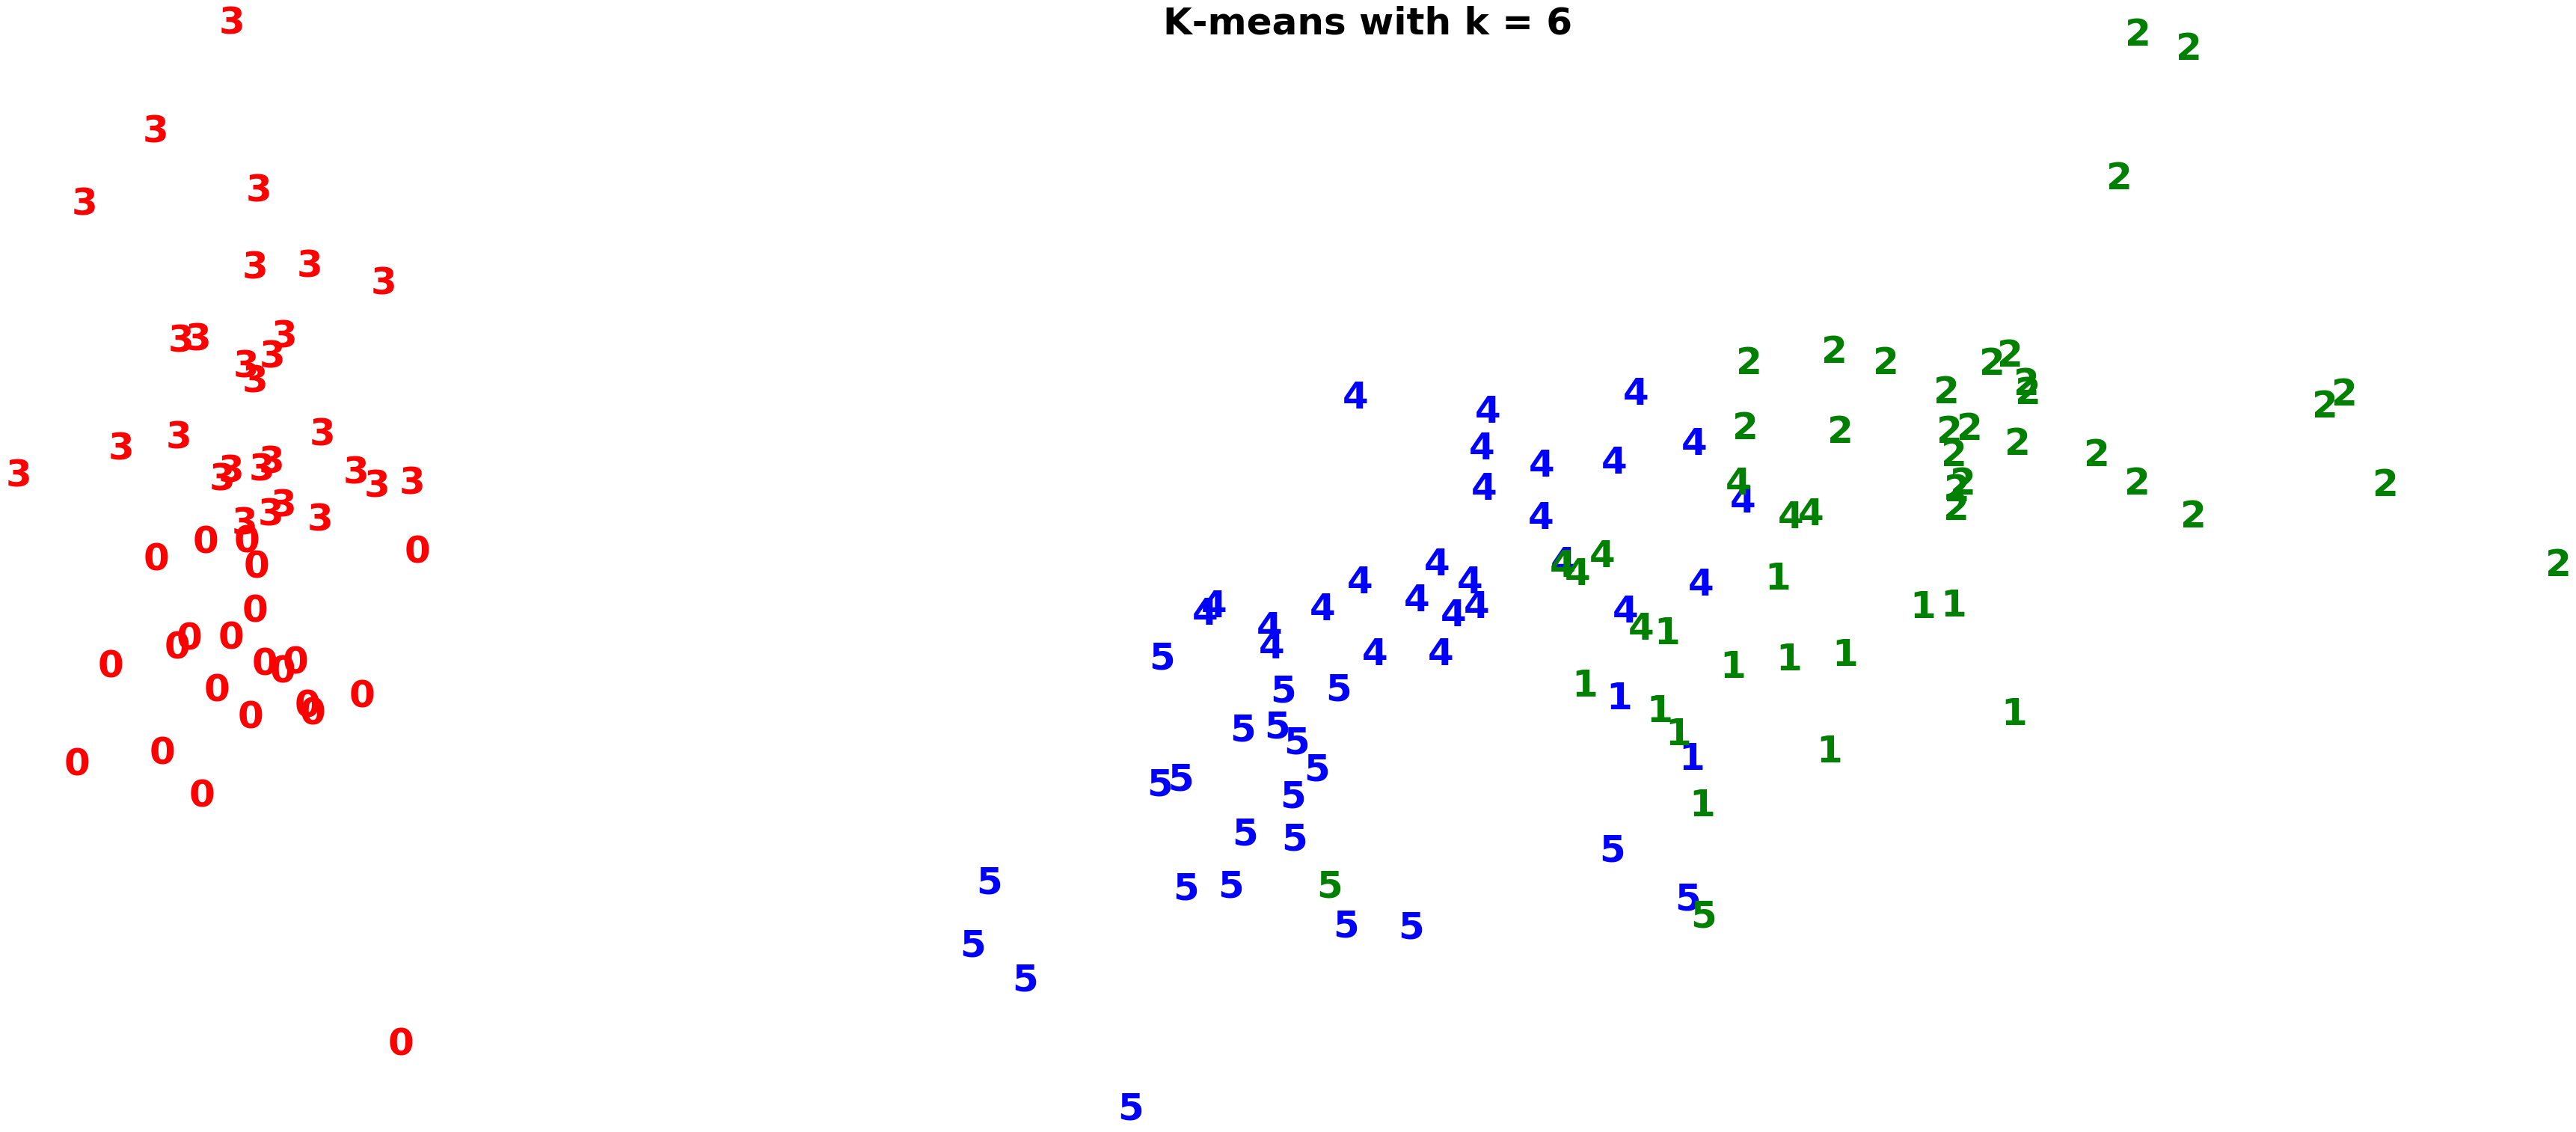

In [12]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


Among the solutions, only the ones with k is equal to 2 and 3 assign a single cluster to the linearly separable class at the left most part of the figures. The others assign more than one class which we don't want for sure. So, k = 2 or k=3 is the only viable ones. However, when k=2, k-means can only assign a single cluster to the linearly non-separable classes where k=3 can assign them to two clusters. Hence, as we might expect, the best solution seems the be the one where k is equal to 3.

## 2. Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [19]:
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)
import warnings
warnings.filterwarnings("ignore")
# no need for an open connection, as we're only doing a single query
engine.dispose()

In [20]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

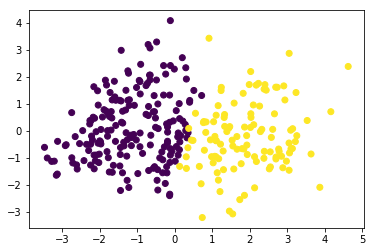

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0       38  151
1      101   13


In [29]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [32]:
# Defining the k-means

cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

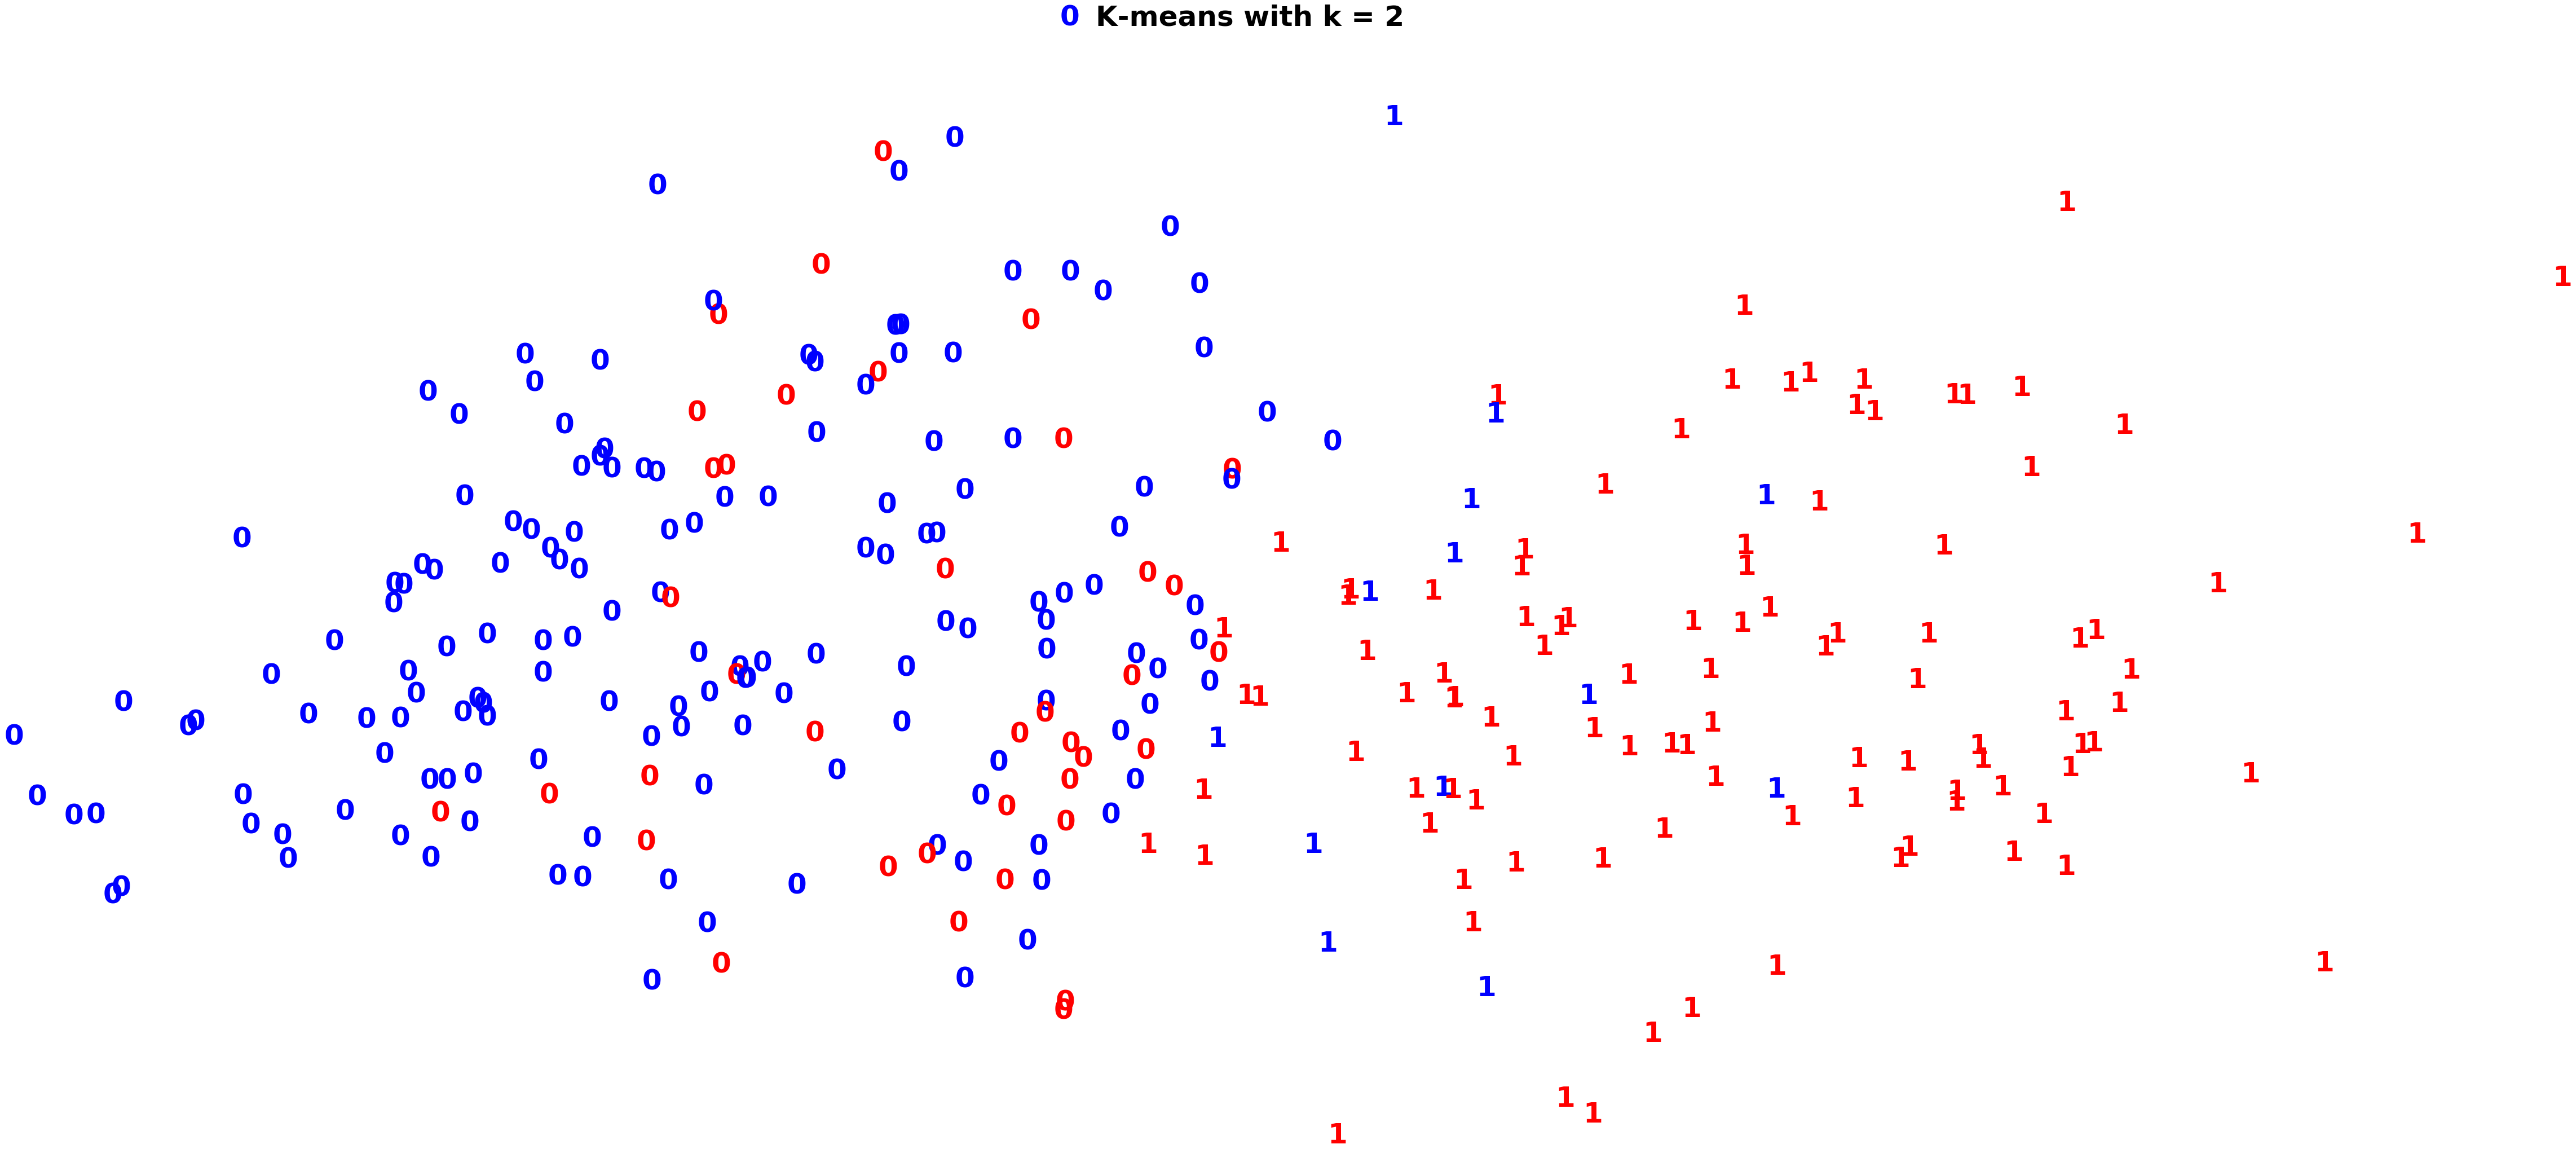

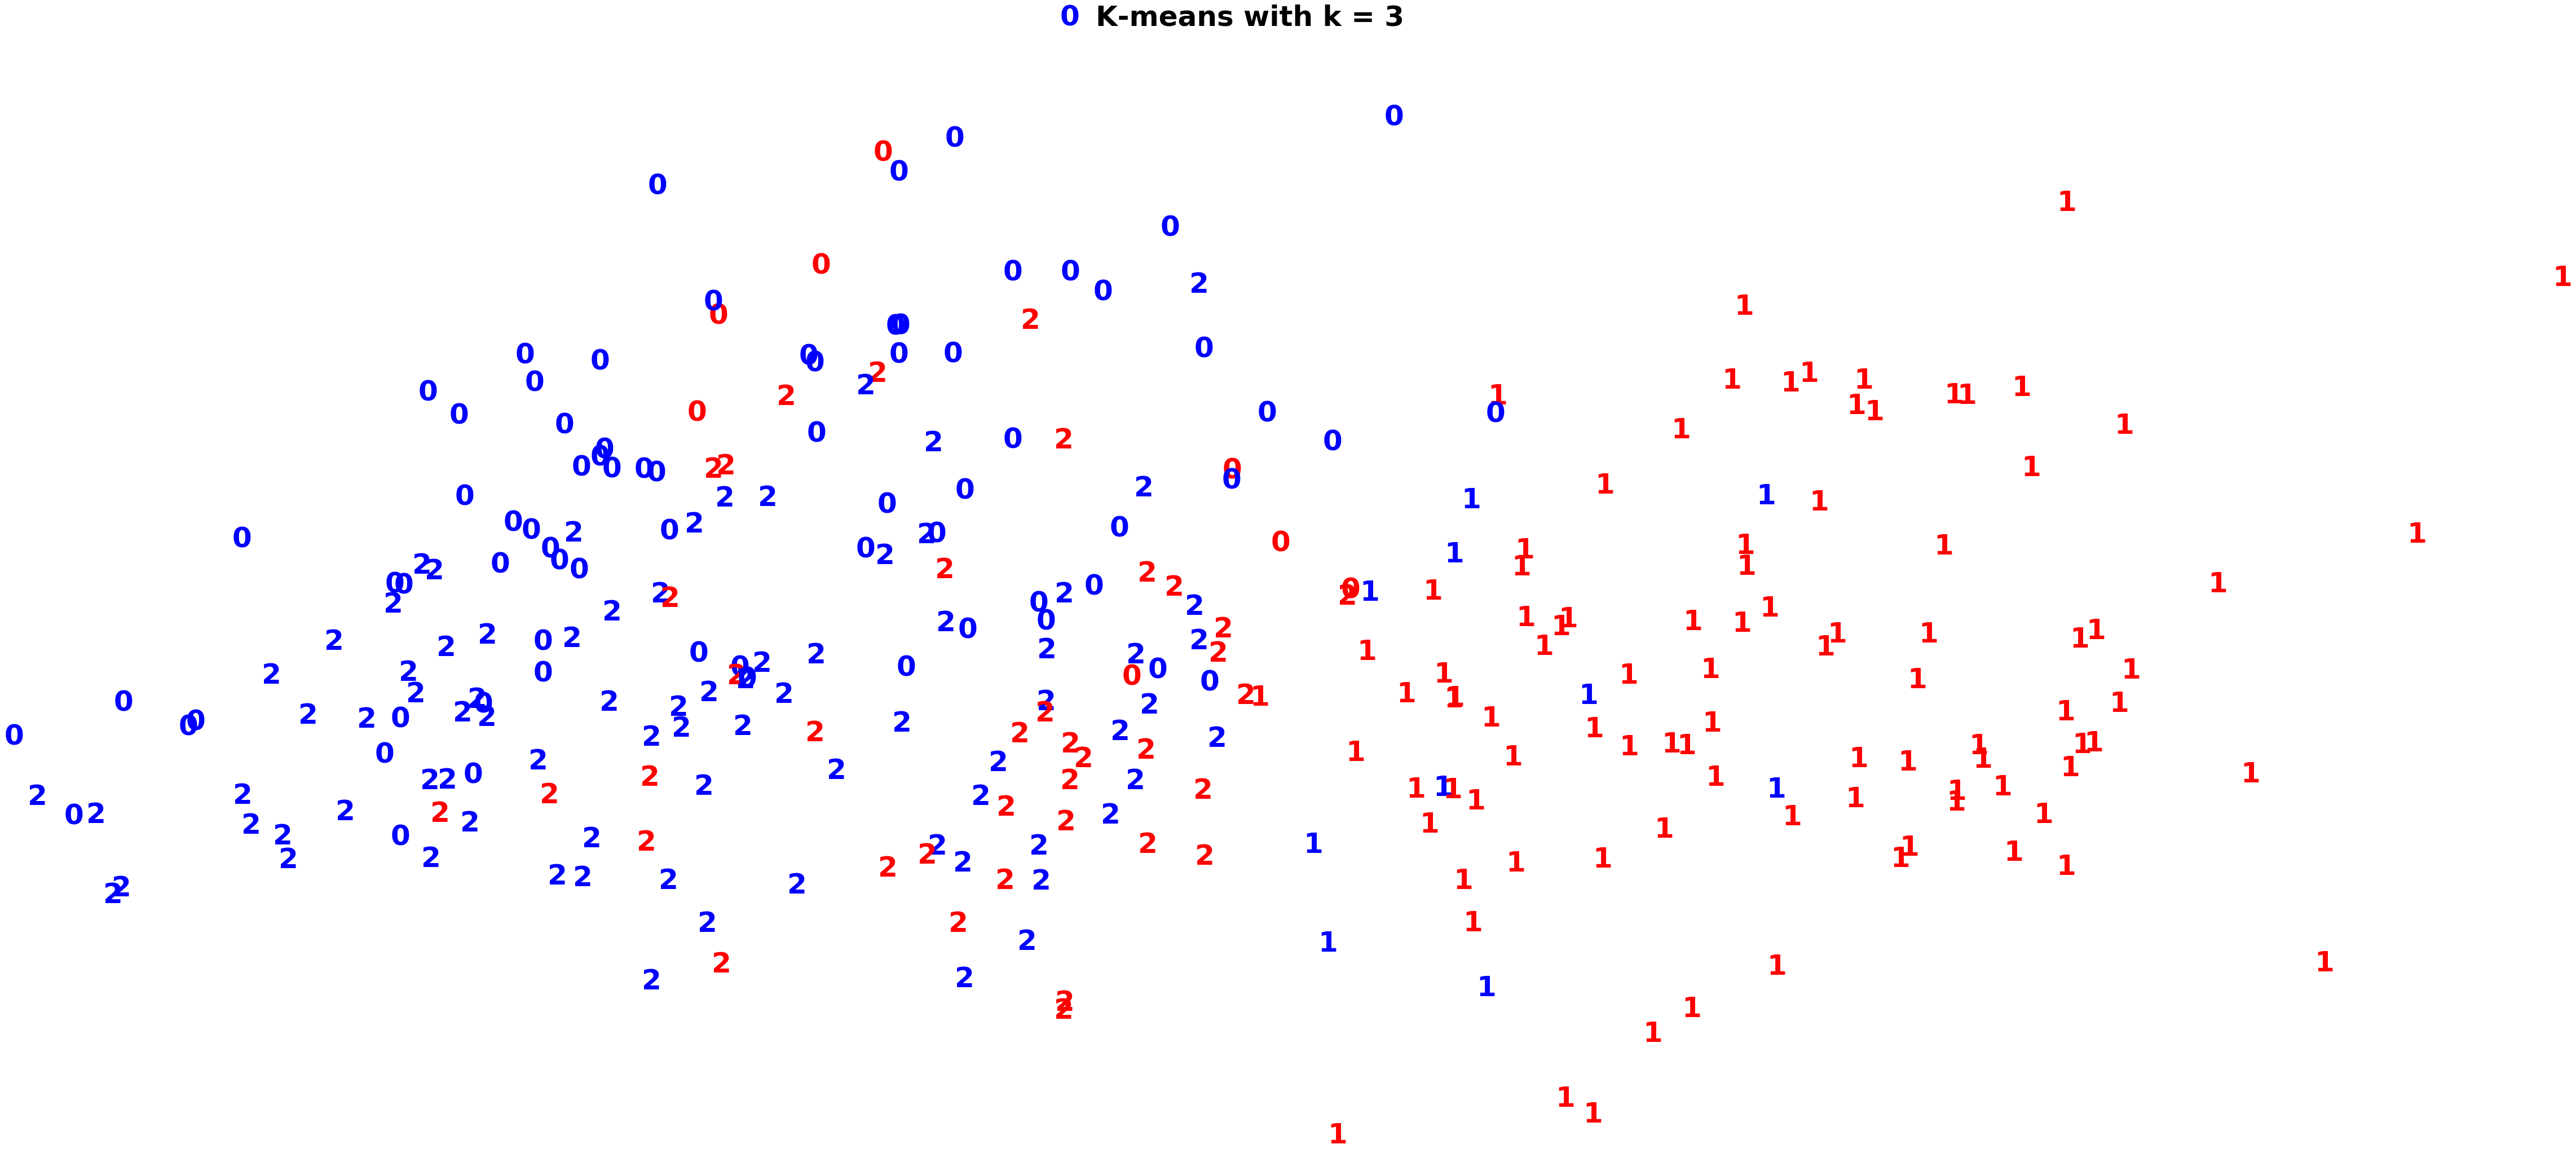

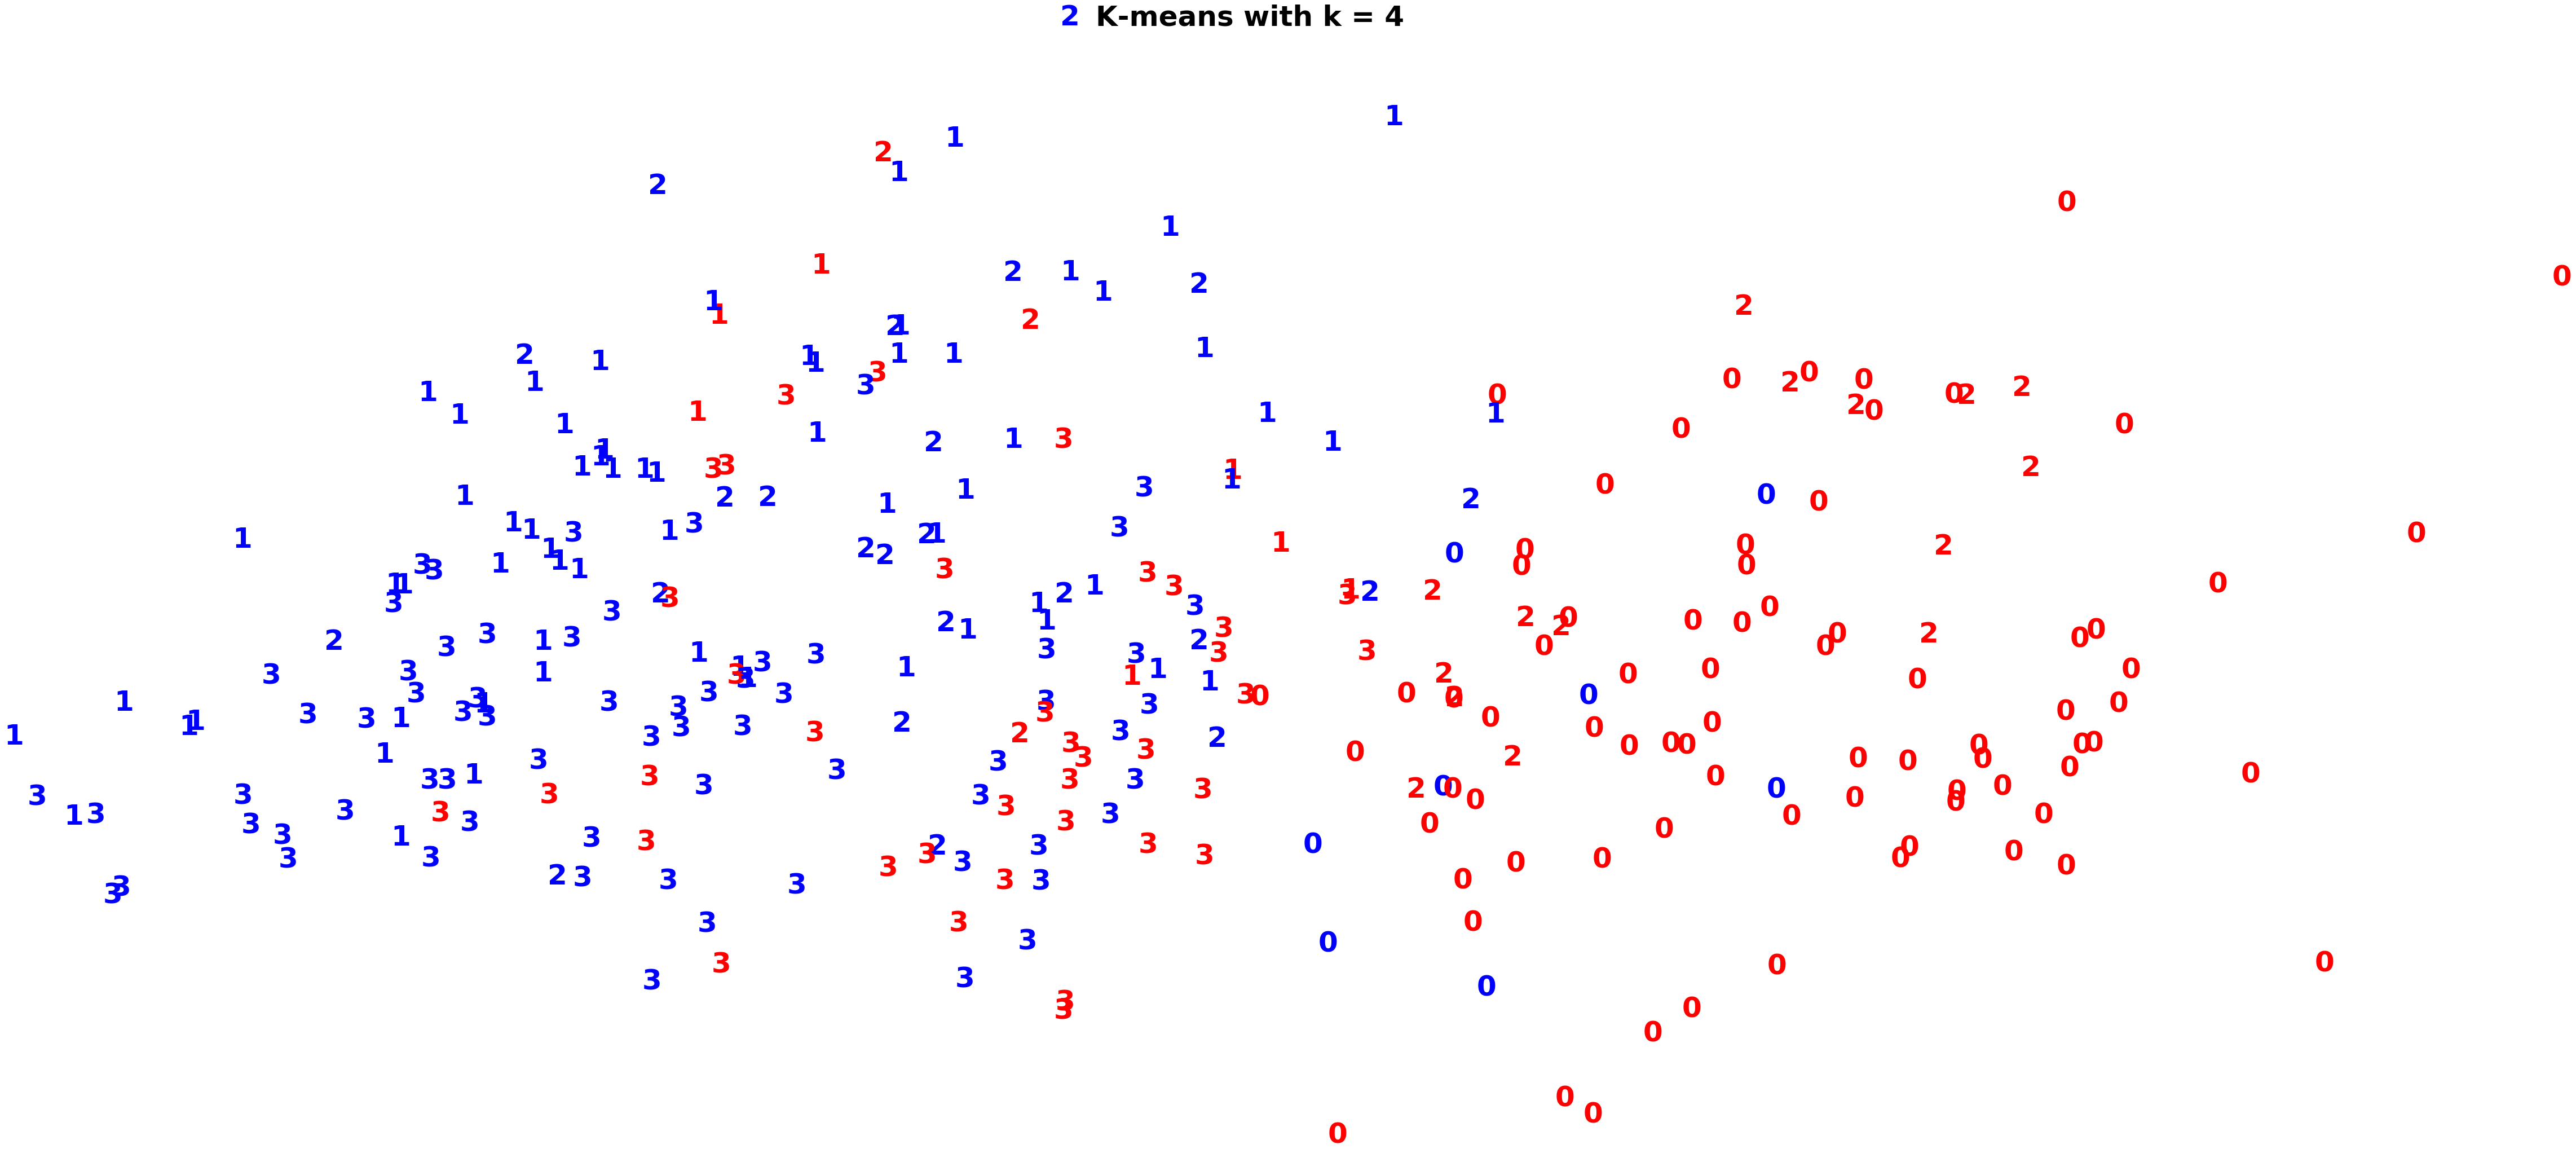

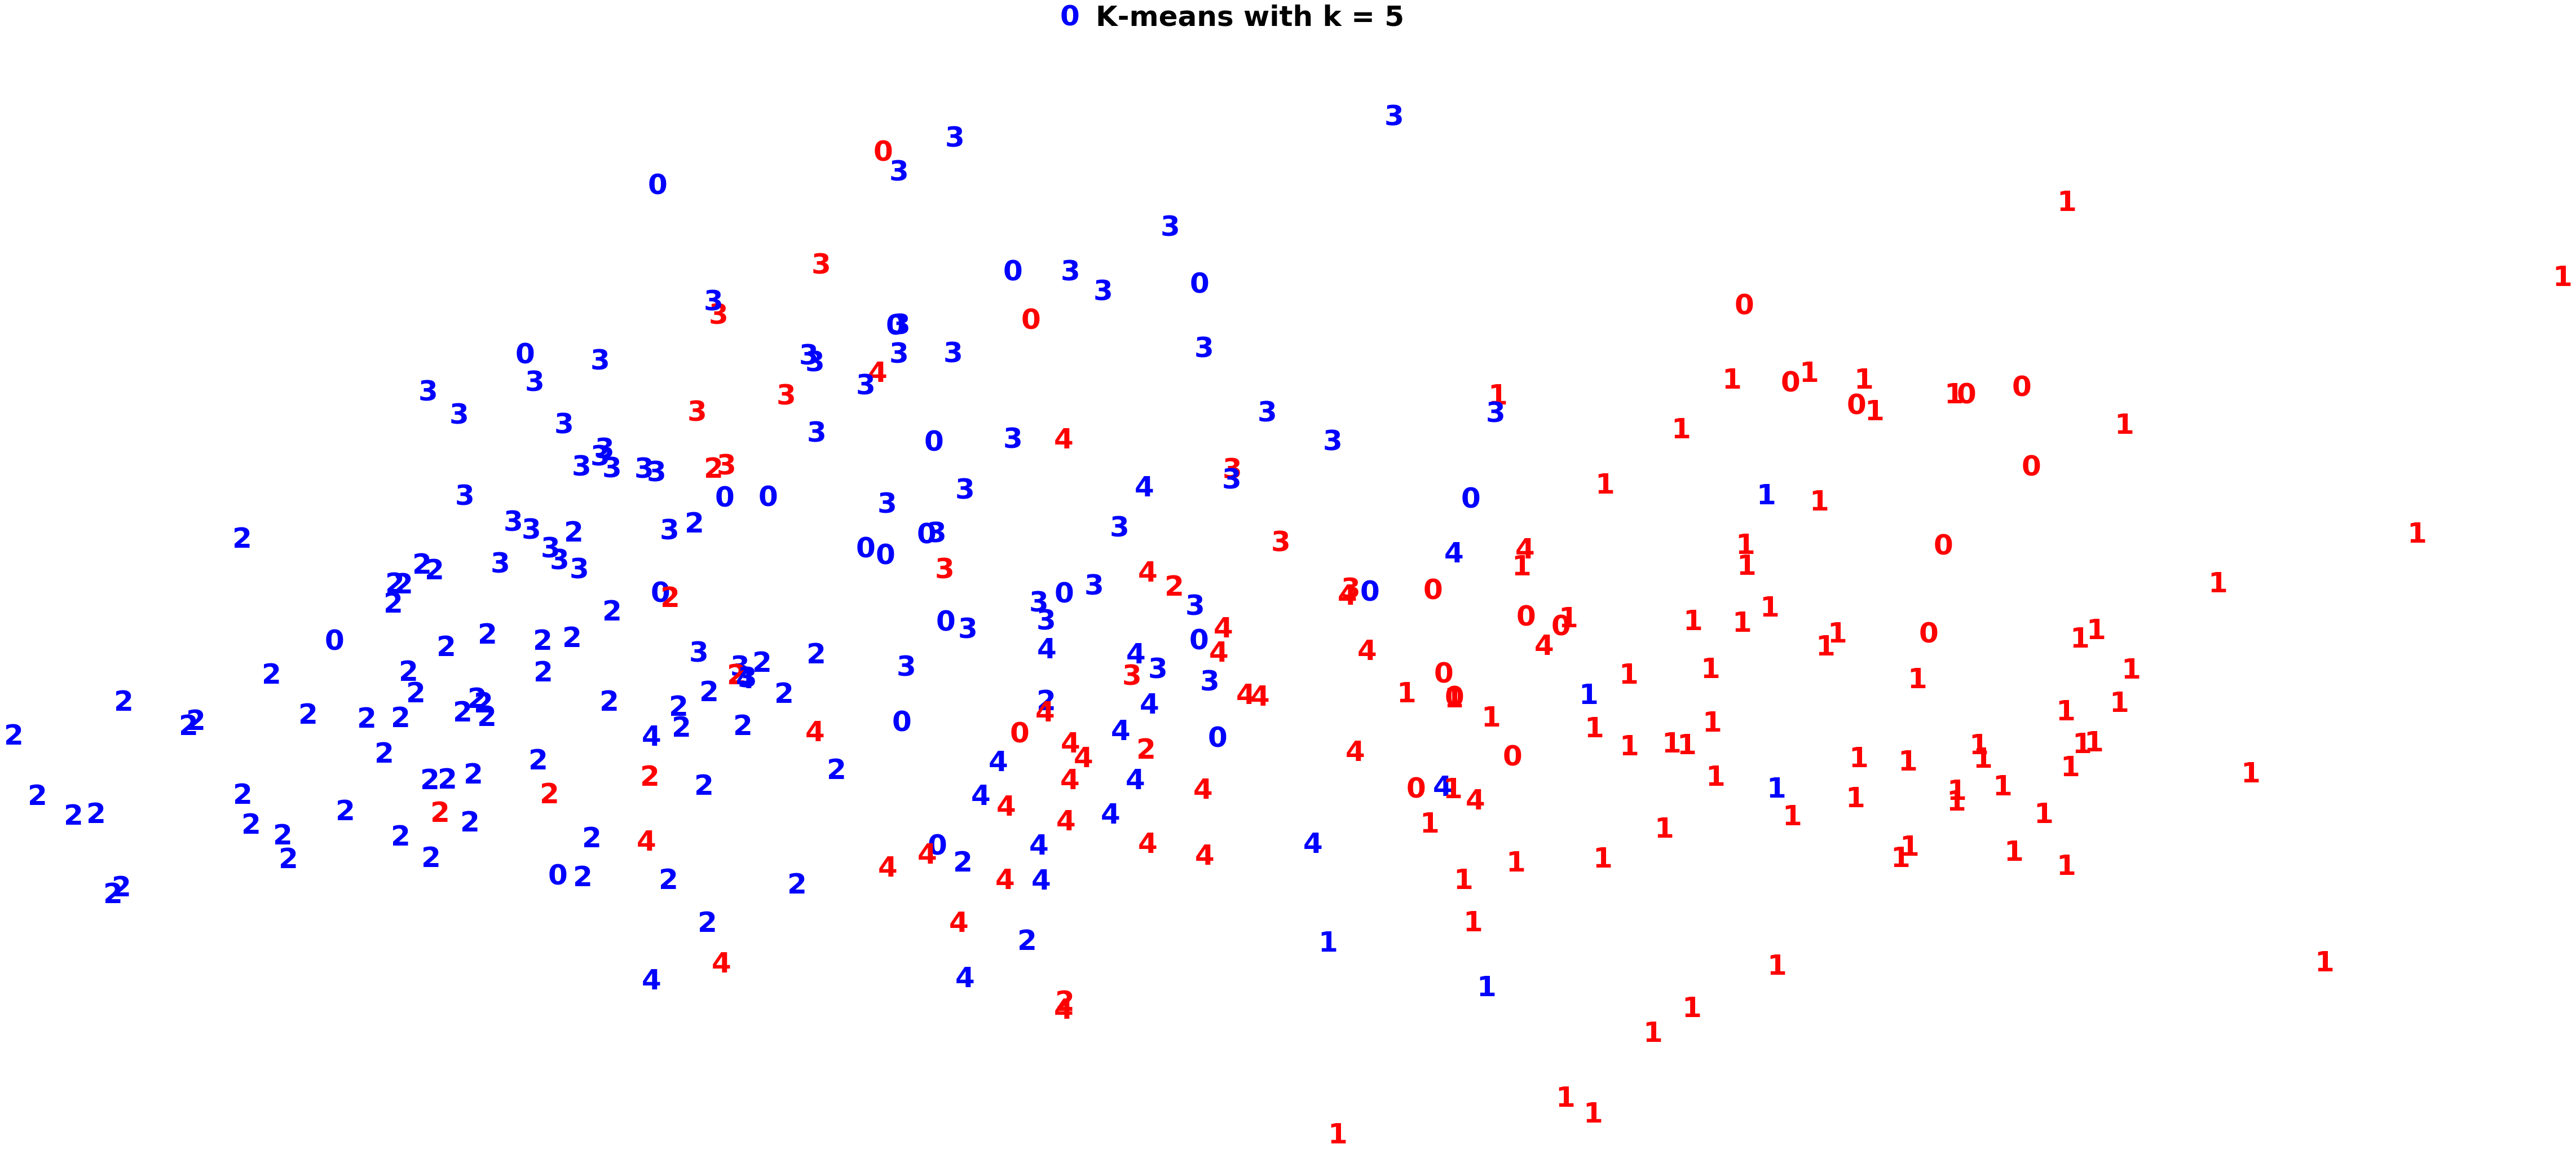

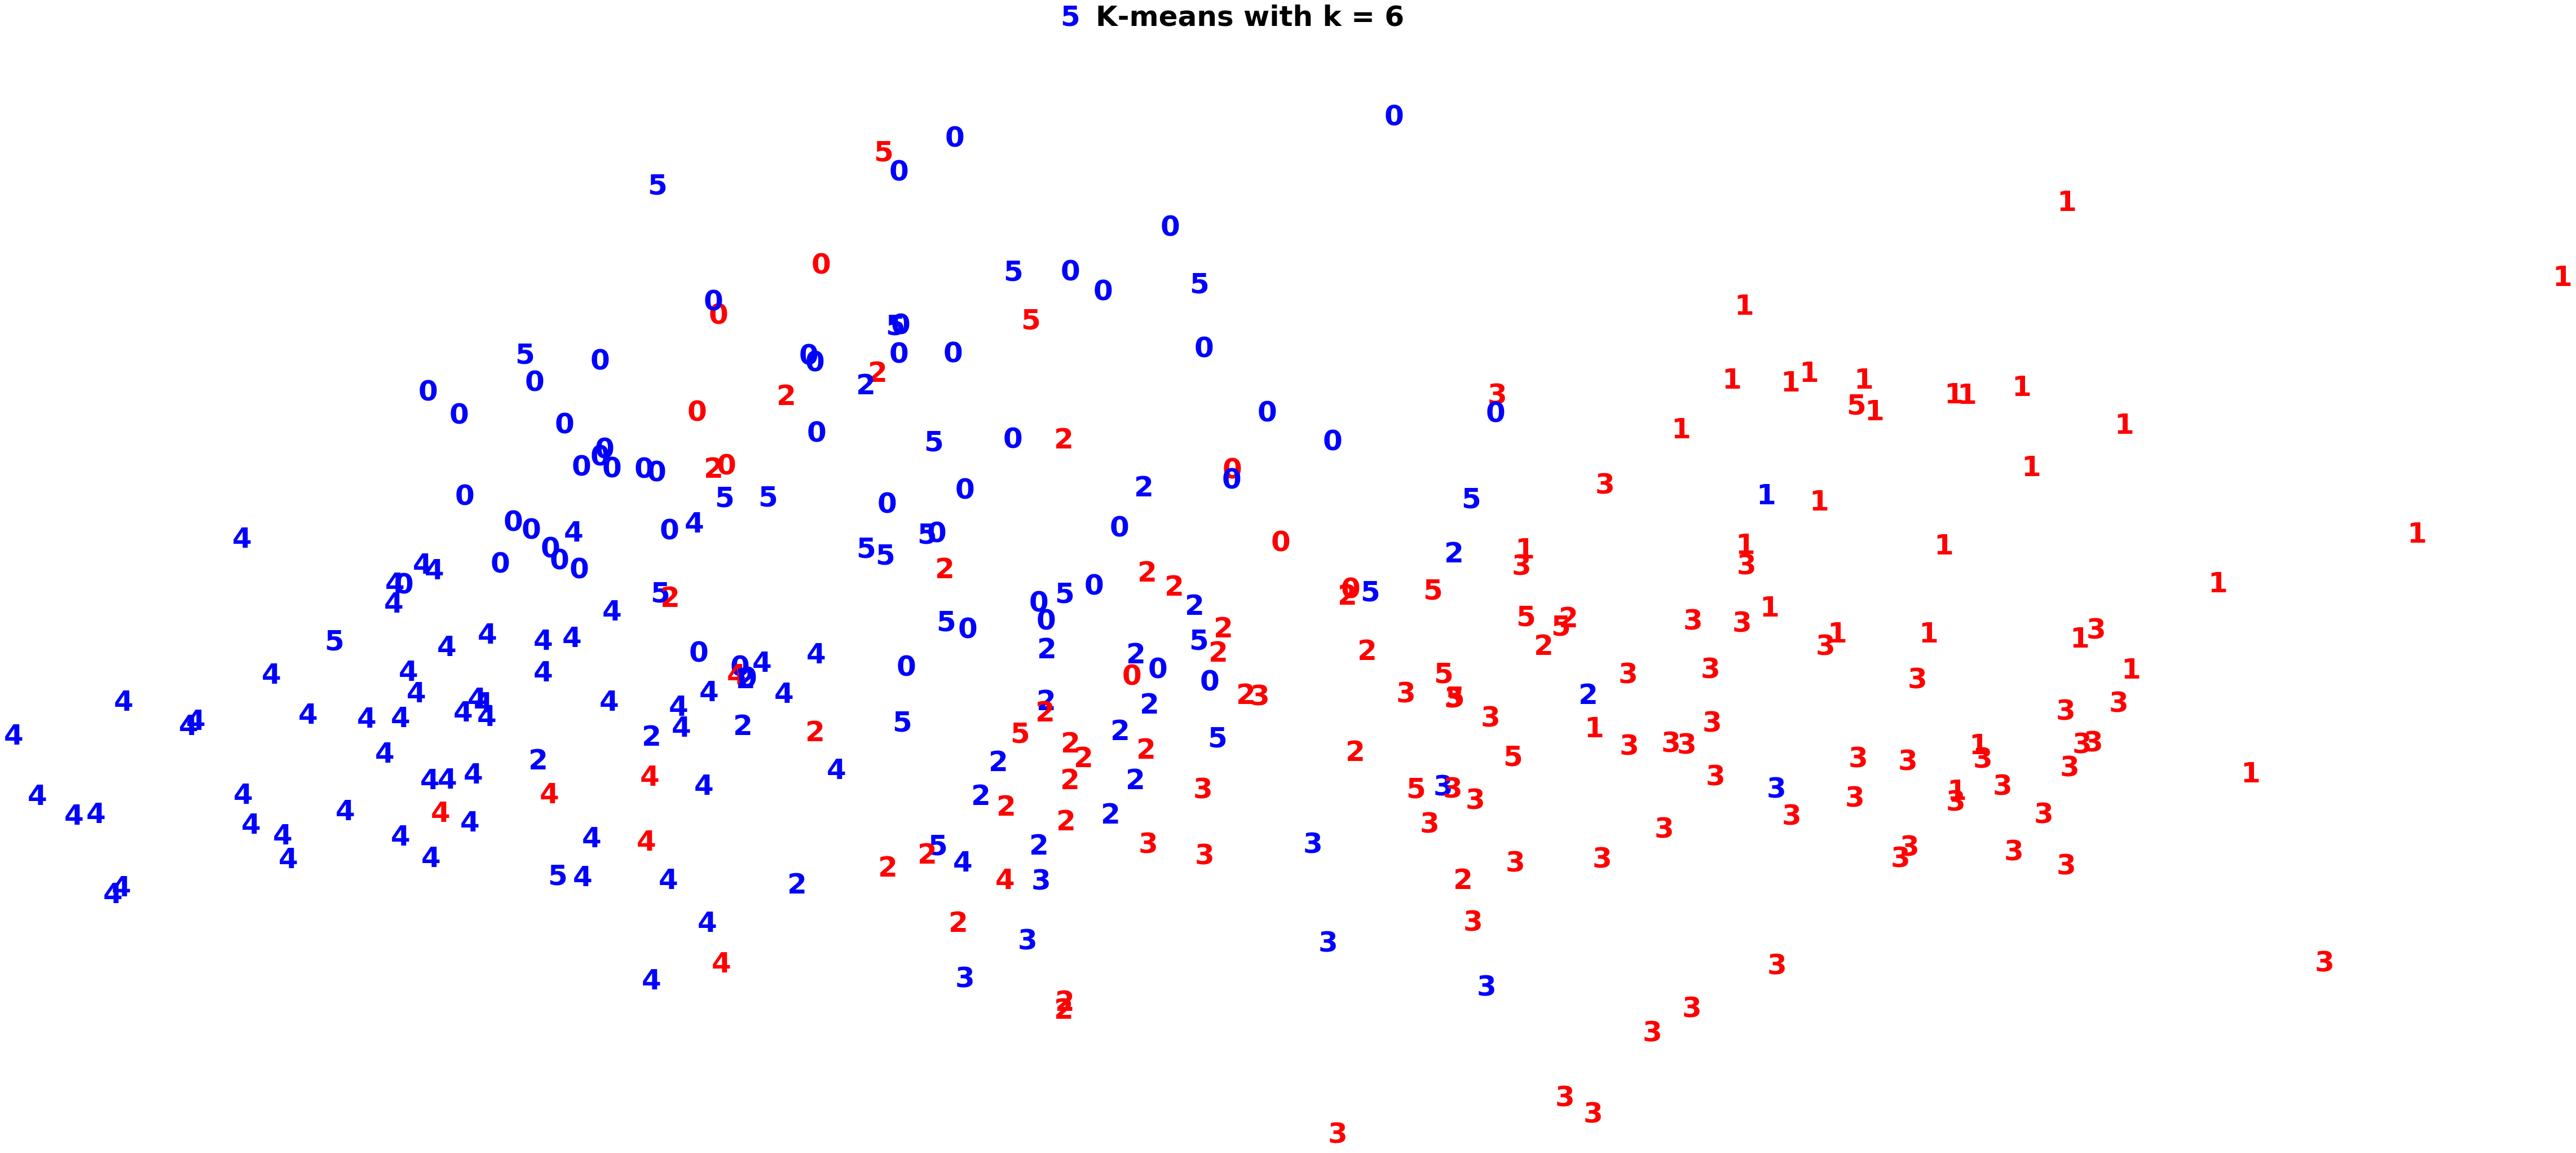

In [33]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()



The model works pretty good and we can see that k-means = 2 has the best solution.